In [1]:
!ls -l

total 43184
-rw-r--r--  1 parker  staff     79459 Mar  8 17:31 subscription retention.ipynb
-rw-r--r--@ 1 parker  staff  21862745 Mar  8 16:50 subscription.csv


In [2]:
!cat subscription.csv | head -3

"user_id","subscription_signup_date","subscription_monthly_cost","country","source","billing_cycles","is_active"
1459,"January, 2015",29,"Spain","ads",4,0
12474,"January, 2015",49,"France","ads",5,0
cat: stdout: Broken pipe


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

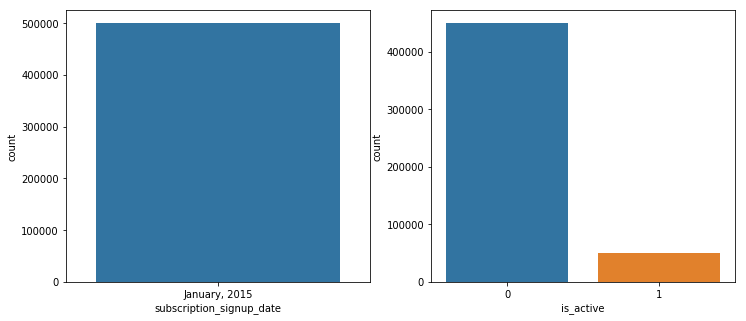

In [14]:
data = pd.read_csv("subscription.csv")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x='subscription_signup_date', data = data, ax = ax[0])
#all users subscribe in January, so we can safely remove this column

sns.countplot(x = 'is_active', data = data, ax = ax[1])

In [5]:
data.drop(columns=['subscription_signup_date'], inplace=True)

**1. For each price point, what percentage of users are still subscribing**

Obviously, we see a trend going here. The higher monthly cost, the lower percentage of subscribing

Text(0.5,1,'Percentage of users still subscribing for each price point')

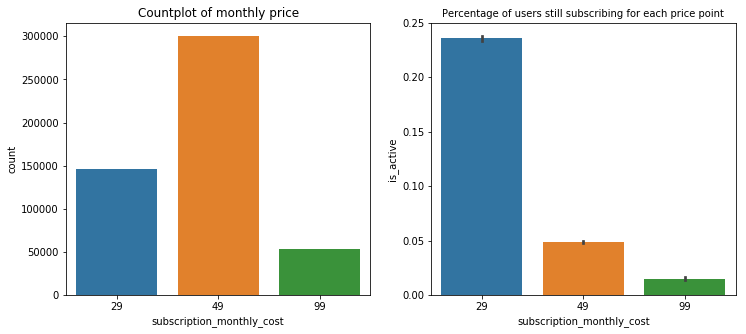

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,5))
sns.countplot(data = data, x = 'subscription_monthly_cost', ax = ax[0])
ax[0].set_title("Countplot of monthly price")

sns.barplot(data = data, x = 'subscription_monthly_cost', y= 'is_active',ax=ax[1])
ax[1].set_title("Percentage of users still subscribing for each price point", fontsize = 10)

**2. The effect of country and source? How would you use these findings to improve company revenue?**

Based on below plots, we find that *China* and *India* users have higher retention rate. And people who are *referred by friends* also have higher retention rate

[Text(0,0,'Spain'),
 Text(0,0,'France'),
 Text(0,0,'Germany'),
 Text(0,0,'China'),
 Text(0,0,'UK'),
 Text(0,0,'US'),
 Text(0,0,'India'),
 Text(0,0,'Italy')]

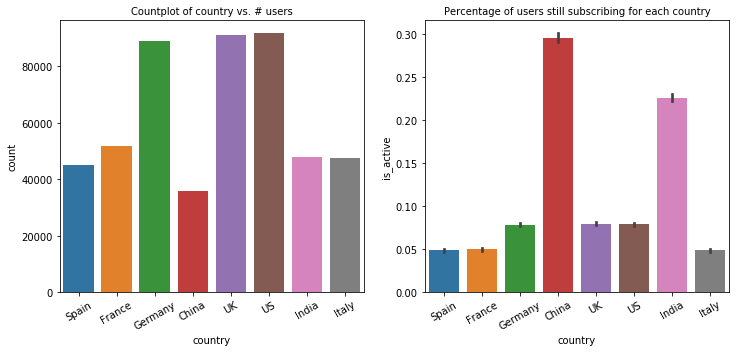

In [7]:
#look at the effect of country first
countries = data['country'].unique()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(x = 'country', data = data, ax = ax[0])
ax[0].set_title("Countplot of country vs. # users", fontsize = 10)
ax[0].set_xticklabels(labels = countries, rotation=30)
sns.barplot(x = 'country', data = data, y = 'is_active', ax= ax[1])
ax[1].set_title("Percentage of users still subscribing for each country", fontsize = 10)
ax[1].set_xticklabels(labels = countries, rotation = 30)

Text(0.5,1,'Percentage of users still subscribing for each source')

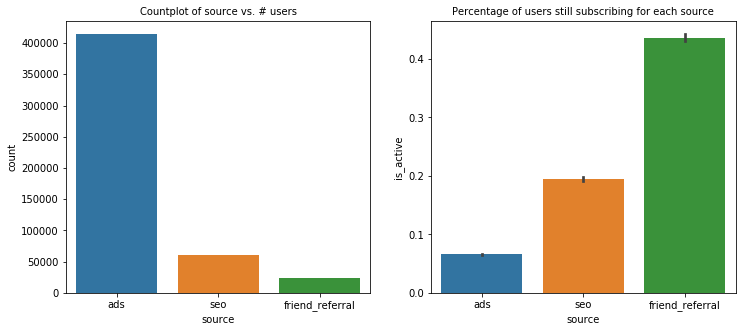

In [8]:
#look at the effect of source
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(x = 'source', data = data, ax = ax[0])
ax[0].set_title("Countplot of source vs. # users", fontsize = 10)
sns.barplot(x = 'source', data = data, y = 'is_active', ax= ax[1])
ax[1].set_title("Percentage of users still subscribing for each source", fontsize = 10)

**3. A model to predict monthly retention rate**

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
cols = ['country', 'source']
for col in cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    
data.drop(columns=['user_id'], inplace = True)
low_price = data[data.subscription_monthly_cost == 29]
mid_price = data[data.subscription_monthly_cost == 49]
high_price = data[data.subscription_monthly_cost == 99]
print(low_price.shape, mid_price.shape, high_price.shape)

(146362, 5) (300397, 5) (53241, 5)


In [18]:
datasets = [low_price, mid_price, high_price]
names = ['low','mid','high']
for dataset, name in zip(datasets, names):
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = ['is_active']), \
                                                        dataset['is_active'], test_size = 0.2)
    clf = GradientBoostingClassifier()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(preds[:10])
    accu = accuracy_score(preds, y_test)
    print("Accuracy of {} is {:.3f}".format(name, accu))

[1 0 0 0 1 0 0 0 0 0]
Accuracy of low is 1.000
[1 0 0 0 0 0 0 0 0 0]
Accuracy of mid is 1.000
[0 0 0 0 0 0 0 0 0 0]
Accuracy of high is 1.000
